<a href="https://colab.research.google.com/github/BrianBehnke/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Assignment

In writing - work on notebook 113 ("Plotting Playground") from your GitHub fork. Add at least one commit today, and (suggested using your data from yesterday) complete at least:

- 3 plots (start simple i.e. box, scatter, bar, histogram, but can do one "fancy"/non-traditional if you'd like)
- Answers (in text blocks) to the questions "What insight do your plots give you in the data?" and "What was most challenging about making plots?"

In [0]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

# Setting the display options for pandas display to enable larger amount of 
# info to be shown on screen
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Set URL variable
# Source: https://archive.ics.uci.edu/ml/datasets/Mushroom
mushroom_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Import data into a dataframe
# Using a header option in the read.csv I will also fix the names of the columns

column_names = ["cap-shape", "cap-surface", "cap-color", "bruises",
                       "odor", "gill-attachment", "gill-spacing", "gill-size",
                       "gill-color", "stalk-shape", "stalk-root",
                       "stalk-surface-above-ring", "stalk-surface-below-ring",
                       "stalk-color-above-ring", "stalk-color-below-ring",
                       "veil-type", "veil-color", "ring-number", "ring-type",
                       "spore-print-color", "population", "habitat"]

mushroom_data = pd.read_csv(mushroom_url, header=None, names=column_names)


In [6]:
# Replace all of the '?' to NaN
mushroom_data_replace = mushroom_data.replace('?', np.nan)

# We should take a look at filling based on the most likely value, the mode
mushroom_data_mode_filled = mushroom_data_replace.copy()

for column in mushroom_data_replace:
  column_mode = mushroom_data_replace[column].mode()[0]
  mushroom_data_mode_filled[column].fillna(column_mode, inplace=True)

mushroom_data_mode_filled.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
mushroom_data_mode_filled.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


New dataset, with numbers
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/


In [13]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

# Setting the display options for pandas display to enable larger amount of 
# info to be shown on screen
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Set URL variable
# Source: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Import data into a dataframe
# Using a header option in the read.csv I will also fix the names of the columns

column_names_wine = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
                       "Magnesium", "Total phenols", "Flavanoids", 
                       "Nonflavanoid phenols", "Proanthocyanins", 
                       "Color intensity", "Hue",
                       "OD280/OD315 of diluted wines", "Proline"]

wine_data = pd.read_csv(wine_url, header=None, names=column_names_wine)
wine_data.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
wine_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


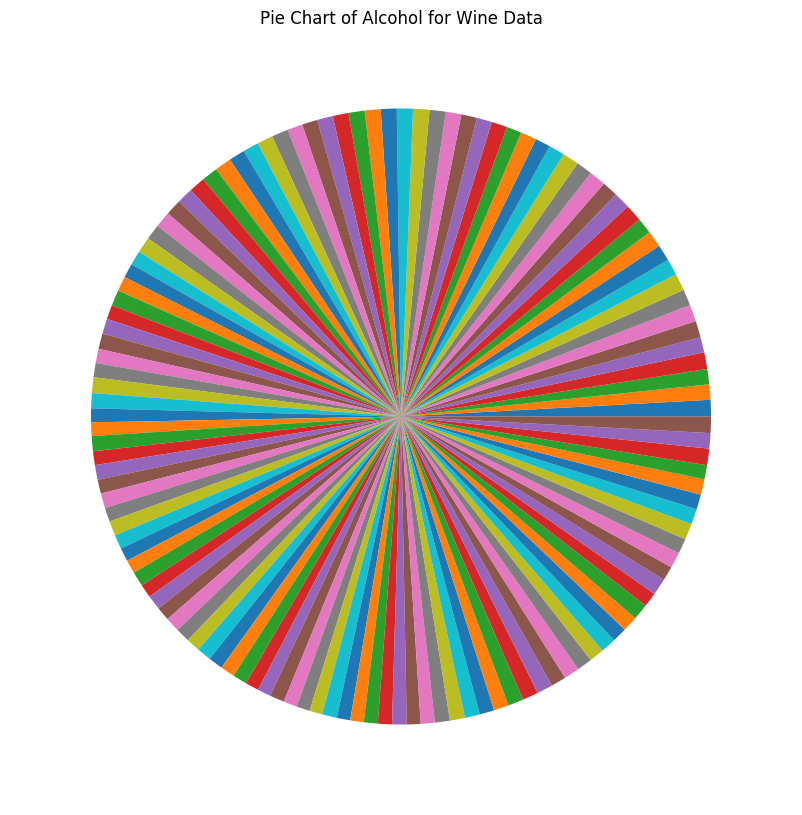

In [61]:
# No missing values and the headers are properly set
# Ready for graphing the data

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.title('Pie Chart of Alcohol for Wine Data')
plt.pie(wine_data['Alcohol'].unique());

plt.show()

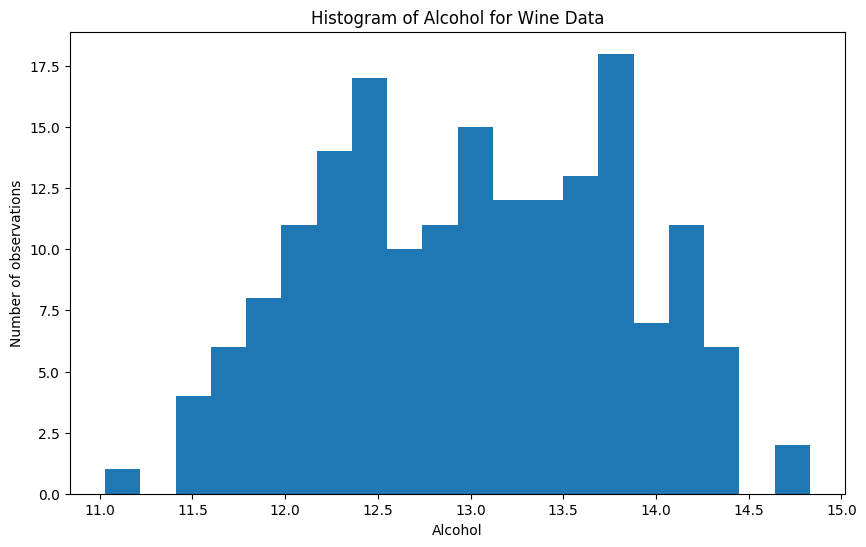

In [58]:
#Histogram

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.hist(wine_data['Alcohol'], bins=20)
plt.title('Histogram of Alcohol for Wine Data')
plt.xlabel('Alcohol')
plt.ylabel('Number of observations')
plt.show()

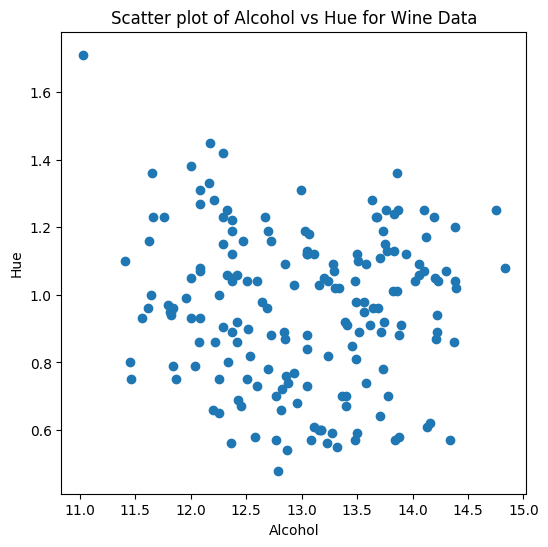

In [65]:
# Pie chart with this many unique observations is not useful
# Lets look at a scatter plot

fig, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Scatter plot of Alcohol vs Hue for Wine Data')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.scatter(wine_data['Alcohol'], wine_data['Hue'])
plt.show()

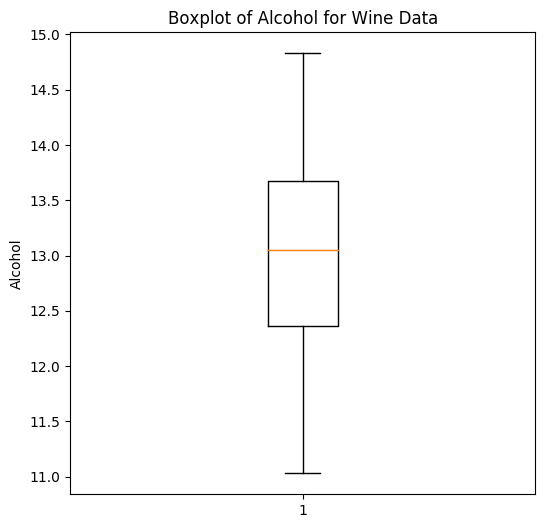

In [68]:
# That looks much nicer than the pie chart
# Lets try a box plot
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Boxplot of Alcohol for Wine Data')
plt.ylabel('Alcohol')

plt.boxplot(wine_data['Alcohol'])
plt.show()


In [0]:
grouped_data = wine_data["Alcohol"].groupby(wine_data['Hue'])
list(grouped_data)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


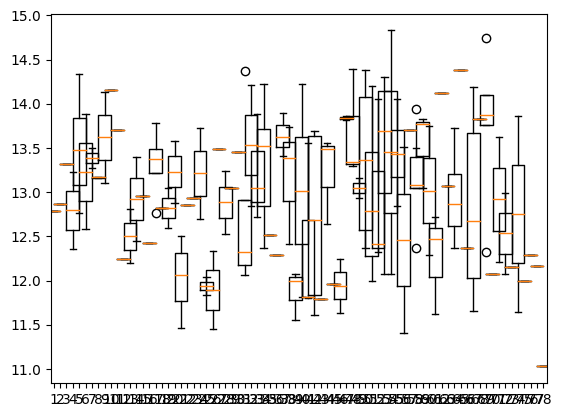

In [32]:
plt.boxplot([group for name, group in grouped_data], widths=2);
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


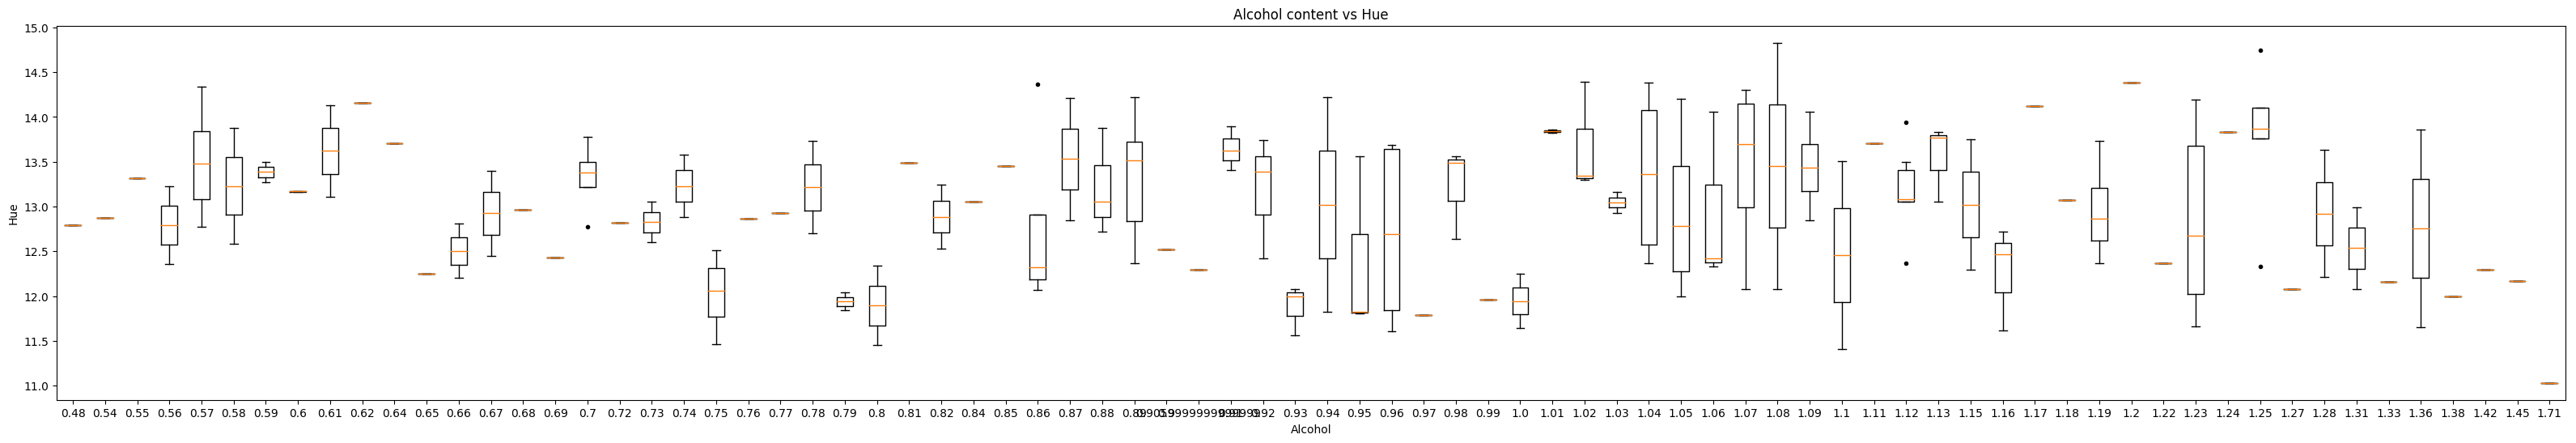

In [69]:
# Maybe we need to beautify this boxplot

boxplot_data = [group for name, group in grouped_data]

fig, ax1 = plt.subplots(figsize=(40, 6))
bp = plt.boxplot(boxplot_data, sym='k.', showfliers=True)
#plt.setp(bp['fliers'], color='red', marker='k.')  # TODO - why does this break?

ax1.set_axisbelow(True)
ax1.set_title('Alcohol content vs Hue')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Hue')

# Set x axis labels by grabbing and sorting unique group values
# plt.setp(ax1, xticklabels=sorted(water_data[16].unique()))

# Set x axis labels by getting the names from the grouped data
plt.setp(ax1, xticklabels=[name for name, group in grouped_data])

plt.show()

In [0]:
# After making the chart wider to fit the data, may want to pare the number 
# of observations down to fit better
#TODO - figure out how to eliminate some of the data